![](https://miro.medium.com/max/481/1*cxfqR8NAj8HGal8CVOZ7hg.png)

In [1]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandera as pa
plt.style.use("seaborn")

In [4]:
#Criando o DataFrame
df = pd.read_excel("./Base/AdventureWorks.xlsx", parse_dates=['Data Venda','Data Envio'])

In [5]:
#Visualizando as 5 primeiras linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [6]:
#Quantidade de linhas e colunas
df.shape

(904, 16)

In [7]:
#Verificando os tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

#### - **Validação dos tipos de dados**

In [8]:
df['ID Loja'] = df['ID Loja'].apply(str)
df['ID Produto'] = df['ID Produto'].apply(str)
df['ID Cliente'] = df['ID Cliente'].apply(str)
df['No. Venda'] = df['No. Venda'].apply(str)

In [9]:
schema = pa.DataFrameSchema(
    columns = {
        "Data Venda": pa.Column(pa.DateTime),
        "Data Envio": pa.Column(pa.DateTime),
        "ID Loja": pa.Column(pa.String),
        "ID Produto": pa.Column(pa.String),
        "ID Cliente": pa.Column(pa.String),
        "No. Venda": pa.Column(pa.String)
    }
)

In [10]:
schema.validate(df)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,2008-03-22,2008-04-04,306,1226,19049,200803224CS555,330.99,999.0,6,419.58,5574.42,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
900,2008-10-04,2008-10-15,306,1155,19057,200810044CS636,324.69,980.0,6,1176.00,4704.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
901,2008-12-11,2008-12-15,306,1155,19060,200812114CS676,324.69,980.0,6,1176.00,4704.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
902,2008-12-17,2008-12-21,306,1226,19060,200812174CS676,330.99,999.0,6,1198.80,4795.20,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black


In [11]:
del(schema)

In [12]:
#Verificação dos ID convertidos para string
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                   object
ID Produto                object
ID Cliente                object
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

#### - **Fazendo uma Descritiva**

In [13]:
df.describe()

,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda
count,904.000000,904.000000,904.000000,904.000000,904.000000
mean,272.006150,742.527965,62.950221,689.123294,6620.139538
std,129.765051,368.589889,148.945964,822.363117,4319.407257
min,5.090000,9.990000,2.000000,0.000000,159.840000
25%,324.690000,758.000000,6.000000,0.000000,3920.000000
50%,330.660000,980.000000,9.000000,461.166000,5798.700000
75%,348.580000,998.000000,17.000000,1005.075000,7986.000000
max,348.580000,999.000000,1560.000000,6272.000000,29400.000000


In [14]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [15]:
# Renomeando as colunas para tiras os espaços e evitar erros nos filtros
df.rename(columns={
    "Data Venda":"Data_Venda",
    "Data Envio":"Data_Envio",
    "ID Loja":"ID_Loja",
    "ID Produto":"ID_Produto",
    "ID Cliente":"ID_Cliente",
    "No. Venda":"NoVenda_NF",
    "Custo Unitário":"Custo_Unitario",
    "Preço Unitário":"Preco_Unitario",
    "Quantidade":"Qtd",
    "Valor Desconto":"Vlr_Desc",
    "Valor Venda":"Vlr_Venda"
},inplace=True)
df.columns

Index(['Data_Venda', 'Data_Envio', 'ID_Loja', 'ID_Produto', 'ID_Cliente',
       'NoVenda_NF', 'Custo_Unitario', 'Preco_Unitario', 'Qtd', 'Vlr_Desc',
       'Vlr_Venda', 'Produto', 'Fabricante', 'Marca', 'Classe', 'Cor'],
      dtype='object')

In [16]:
df.query('ID_Produto == "384"')[['ID_Produto','Produto']]

,ID_Produto,Produto
0,384,Adventure Works Laptop15.4W M1548 Red
1,384,Adventure Works Laptop15.4W M1548 Red
2,384,Adventure Works Laptop15.4W M1548 Red
3,384,Adventure Works Laptop15.4W M1548 Red
4,384,Adventure Works Laptop15.4W M1548 Red
...,...,...
813,384,Adventure Works Laptop15.4W M1548 Red
814,384,Adventure Works Laptop15.4W M1548 Red
815,384,Adventure Works Laptop15.4W M1548 Red
816,384,Adventure Works Laptop15.4W M1548 Red


In [17]:
#Verificando se numero da venda é unico par asetar como Index
df['NoVenda_NF'].is_unique

False

 **Missing Values**

In [18]:
#Verificando se temos dados faltantes
df.isnull().sum()

Data_Venda        0
Data_Envio        0
ID_Loja           0
ID_Produto        0
ID_Cliente        0
NoVenda_NF        0
Custo_Unitario    0
Preco_Unitario    0
Qtd               0
Vlr_Desc          0
Vlr_Venda         0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
dtype: int64

#### - **Algumas Frequências**

In [19]:
# Frequêncis dos Produtos
produtos = df[['ID_Produto','Produto','Qtd']].groupby(['ID_Produto','Produto']).count().sort_values(by='Qtd',ascending=True, inplace=False)
produtos

,,Qtd
ID_Produto,Produto,
2497,Headphone Adapter for Contoso Phone E130 White,85
2496,Headphone Adapter for Contoso Phone E130 Silver,87
1226,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,89
1178,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,90
1202,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,94
1155,Fabrikam Trendsetter 2/3'' 17mm X100 Black,103
384,Adventure Works Laptop15.4W M1548 Red,115
1203,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,118
366,Adventure Works Laptop15.4W M1548 Black,123


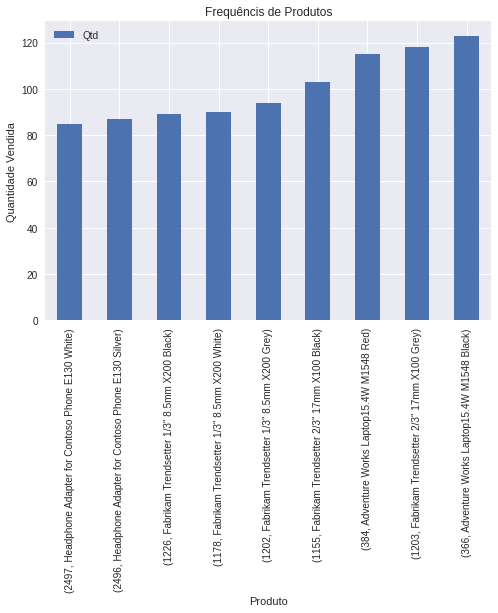

In [20]:
produtos.plot.bar(title="Frequêncis de Produtos")
plt.xlabel("Produto")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation='90')
plt.show()

#### - **O Produto com maior ocorrência nas vendas é o 366 e o com menos é o 2497**

In [21]:
#Vendos o Produto mais vendo e o menos vendido
filtro1 = produtos.Qtd==produtos.Qtd.max()
filtro2 = produtos.Qtd==produtos.Qtd.min()
produtos.loc[filtro1|filtro2].reset_index()

,ID_Produto,Produto,Qtd
0,2497,Headphone Adapter for Contoso Phone E130 White,85
1,366,Adventure Works Laptop15.4W M1548 Black,123


In [22]:
del(filtro1,filtro2,produtos)

#### **- Acrescentar mais algumas colunas**

In [23]:
#Custo Total
df["Custo"] = df["Custo_Unitario"].mul(df["Qtd"]) #Criando a coluna de custo

In [24]:
#Agora que temos a receita e custo e o total, podemos achar o Lucro total
#Vamos criar uma coluna de Lucro que será Receita - Custo
df["Lucro"] = df["Vlr_Venda"] - df["Custo"] 

In [25]:
#Criando uma coluna com total de dias para enviar o produto
df["Tempo_envio"] = df["Data_Envio"] - df["Data_Venda"]

In [26]:
df.head(1)

,Data_Venda,Data_Envio,ID_Loja,ID_Produto,ID_Cliente,NoVenda_NF,Custo_Unitario,Preco_Unitario,Qtd,Vlr_Desc,Vlr_Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


#### - Frequência das Lojas

In [27]:
print(f'Quntidade de Lojas: {df.ID_Loja.nunique()}')
print(f'Lojas: {df.ID_Loja.unique()}')

Quntidade de Lojas: 3
Lojas: ['199' '306' '307']


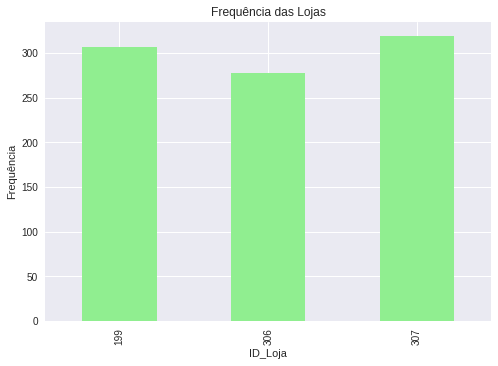

In [28]:
df.groupby(['ID_Loja']).count()['Qtd'].plot.bar(title="Frequência das Lojas", color='lightgreen')
plt.xlabel("ID_Loja")
plt.ylabel("Frequência")
plt.show()

#### **A Loja mais frequênte na base é a 307.**

In [29]:
#Loja com a maior receita
pd.options.display.float_format = '{:20,.2f}'.format
lojas = df.groupby(['ID_Loja']).agg('sum')
lojas

,Custo_Unitario,Preco_Unitario,Qtd,Vlr_Desc,Vlr_Venda,Custo,Lucro
ID_Loja,,,,,,,
199,"82,451.84","227,356.39",20119,"211,611.60","2,181,104.09","886,385.58","1,294,718.51"
306,"78,617.35","214,109.56",12215,"158,067.78","1,723,853.61","707,360.49","1,016,493.12"
307,"84,824.37","229,779.33",24573,"253,288.08","2,079,648.44","893,036.98","1,186,611.46"


In [30]:
#filtros
f1 = lojas.Vlr_Venda == lojas.Vlr_Venda.max() #filtra a maior receita
lojas.loc[f1]

,Custo_Unitario,Preco_Unitario,Qtd,Vlr_Desc,Vlr_Venda,Custo,Lucro
ID_Loja,,,,,,,
199,"82,451.84","227,356.39",20119,"211,611.60","2,181,104.09","886,385.58","1,294,718.51"


#### - **Percebe-se que mesmo a Loja 307 sendo a com maior frequência na base não é a com maior receita, a de maior receita é a 199**

In [31]:
lojas.Vlr_Venda.sum() ## Conferindo se a receita total bate com somatorio das lojas

5984606.142600004

In [32]:
lojas.Custo.sum() ## Conferindo se o Custo total bate com somatorio das lojas

2486783.0500000007

In [33]:
lojas.Lucro.sum() ## Conferindo se o Lucro Total total bate com somatorio das lojas

3497823.0926

In [34]:
del(f1)

#### **- Freqência das Marcas**

In [35]:
marcas = df[['Marca','Qtd']].groupby(['Marca']).agg('count')
marcas

,Qtd
Marca,
Adventure Works,238
Contoso,172
Fabrikam,494


In [36]:
# Função para personalizar as porcentagem e colocar o valor no grafico de pizza
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

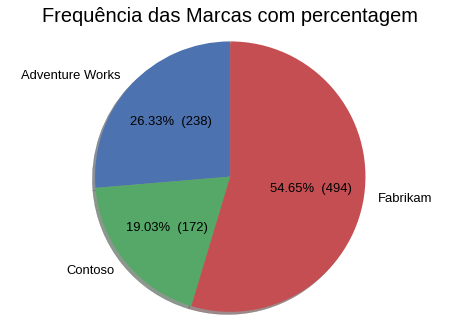

In [37]:
# Gráfico de pizza com as frequências e porcentagens
fig1, ax1 = plt.subplots()
values = marcas.Qtd.values.tolist()
labels = marcas.index.tolist()
ax1.pie(values, labels=labels, autopct=make_autopct(values), shadow=True, startangle=90, textprops=dict(color="black",fontsize='13'))
ax1.axis('equal')
ax1.set_title("Frequência das Marcas com percentagem",color="black",fontsize='20')
plt.show()

In [38]:
del(marcas,values,labels)

#### - Com o Gráfico percebe-se que a maioria dos produtos na base é da marca **Fabrikam** com 54.65% dos registros.

#### - Apos uma breve analise decidi de inicio não deletar nenhuma coluna

In [39]:
#Valor da Receita Total - usando a função apply
print(f'Valor Receita Total: R$ {round(df["Vlr_Venda"].apply("sum"), 2)}')

Valor Receita Total: R$ 5984606.14


In [40]:
#Valor do Custo Total
print(f'Valor Custo Total: R$ {round(df["Custo"].apply("sum"), 2)}')

Valor Custo Total: R$ 2486783.05


In [41]:
#Total Lucro
print(f'Total de Lucro: R$ {round(df["Lucro"].sum(),2)}')

Total de Lucro: R$ 3497823.09


**Agora, queremos saber a média do tempo de envio para cada Marca, e para isso precisamos transformar a coluna Tempo_envio em númerica**

In [42]:
#Extraindo apenas os dias
df["Tempo_envio"] = (df["Data_Envio"] - df["Data_Venda"]).dt.days

In [43]:
df.head(1)

,Data_Venda,Data_Envio,ID_Loja,ID_Produto,ID_Cliente,NoVenda_NF,Custo_Unitario,Preco_Unitario,Qtd,Vlr_Desc,Vlr_Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [44]:
#Verificando o tipo da coluna Tempo_envio
df["Tempo_envio"].dtype

dtype('int64')

In [45]:
#Média do tempo de envio por Marca
df.groupby("Marca")["Tempo_envio"].mean()

Marca
Adventure Works                   8.66
Contoso                           8.47
Fabrikam                          8.51
Name: Tempo_envio, dtype: float64

**Pegando Lucro por Ano e Por Marca**

In [46]:
#Vamos Agrupar por ano e marca
df.groupby([df["Data_Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()

,Data_Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [47]:
#Quantidade vendida por produto
df.groupby("Produto")["Qtd"].sum().sort_values(ascending=False).reset_index()

,Produto,Qtd
0,Headphone Adapter for Contoso Phone E130 Silver,25232
1,Headphone Adapter for Contoso Phone E130 White,25008
2,Adventure Works Laptop15.4W M1548 Black,1089
3,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,1087
4,Adventure Works Laptop15.4W M1548 Red,1047
5,Fabrikam Trendsetter 2/3'' 17mm X100 Black,926
6,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,884
7,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,845
8,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,789


In [48]:
print(f'Quantidade Total de Produtos vendidos: {lojas.Qtd.sum()}')

Quantidade Total de Produtos vendidos: 56907


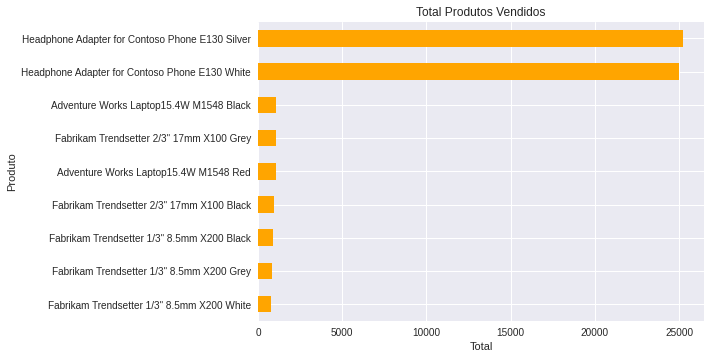

In [49]:
#Gráfico Total de produtos vendidos
df.groupby("Produto")["Qtd"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos", color="orange")
plt.xlabel("Total")
plt.ylabel("Produto");

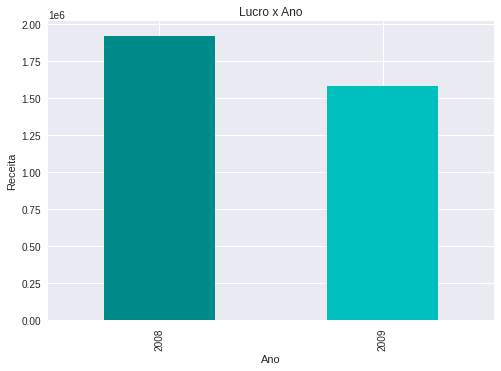

In [50]:
df.groupby(df["Data_Venda"].dt.year)["Lucro"].sum().plot.bar(title="Lucro x Ano", color=['darkcyan','c'])
plt.xlabel("Ano")
plt.ylabel("Receita");

In [51]:
view_lucro_ano = df.groupby(df["Data_Venda"].dt.year)["Lucro"].sum().reset_index()
view_lucro_ano

,Data_Venda,Lucro
0,2008,"1,920,077.71"
1,2009,"1,577,745.38"


In [52]:
view_lucro_ano['Perc(%)'] = (view_lucro_ano['Lucro']/view_lucro_ano.Lucro.sum())*100
view_lucro_ano

,Data_Venda,Lucro,Perc(%)
0,2008,"1,920,077.71",54.89
1,2009,"1,577,745.38",45.11


In [54]:
del(view_lucro_ano)

In [55]:
#Selecionando apenas as vendas de 2009
df_2009 = df.query("Data_Venda.dt.year==2009")
df_2009.head()

,Data_Venda,Data_Envio,ID_Loja,ID_Produto,ID_Cliente,NoVenda_NF,Custo_Unitario,Preco_Unitario,Qtd,Vlr_Desc,Vlr_Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


In [56]:
#Selecionando apenas as vendas de 2008
df_2008 = df.query("Data_Venda.dt.year==2008")
df_2008.head()

,Data_Venda,Data_Envio,ID_Loja,ID_Produto,ID_Cliente,NoVenda_NF,Custo_Unitario,Preco_Unitario,Qtd,Vlr_Desc,Vlr_Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",5
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",6
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",6
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",7


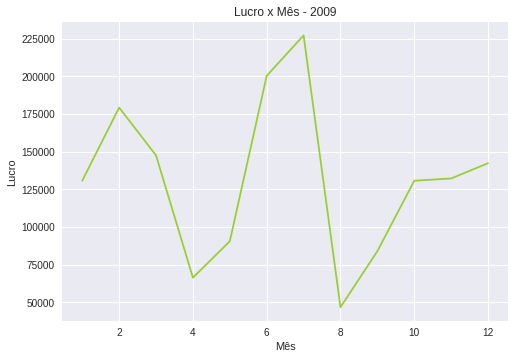

In [57]:
df_2009.groupby(df_2009["Data_Venda"].dt.month)["Lucro"].sum().plot(title="Lucro x Mês - 2009", color='yellowgreen')
plt.xlabel("Mês")
plt.ylabel("Lucro");

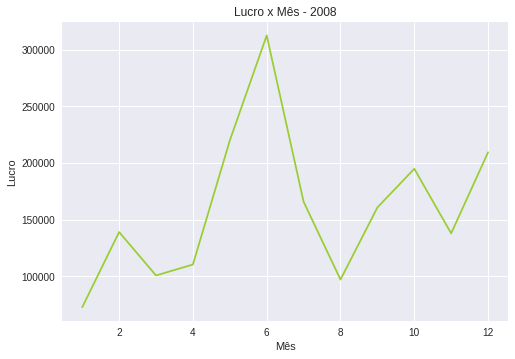

In [58]:
df_2008.groupby(df_2008["Data_Venda"].dt.month)["Lucro"].sum().plot(title="Lucro x Mês - 2008", color='yellowgreen')
plt.xlabel("Mês")
plt.ylabel("Lucro");

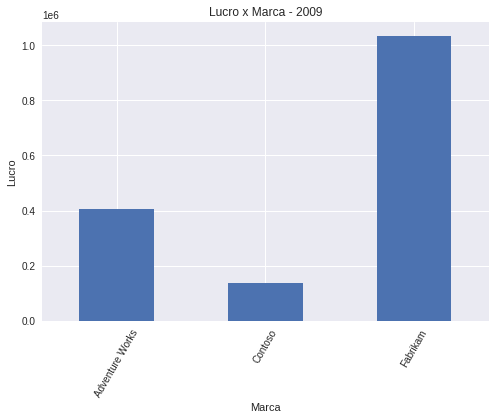

In [60]:
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title="Lucro x Marca - 2009", )
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='60');

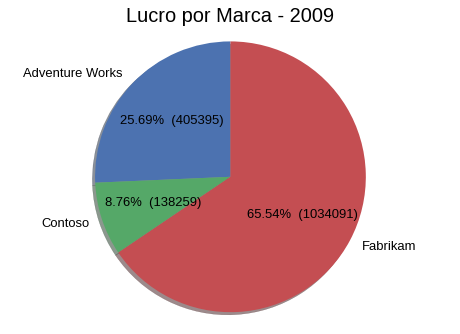

In [61]:
# Gráfico de pizza com lucros e porcentagens das marcas - 2009
fig1, ax1 = plt.subplots()
values = df_2009.groupby("Marca")["Lucro"].sum().values.tolist()
labels = df_2009.groupby("Marca")["Lucro"].sum().index.tolist()
ax1.pie(values, labels=labels, autopct=make_autopct(values), shadow=True, startangle=90, textprops=dict(color="black",fontsize='13'))
ax1.axis('equal')
ax1.set_title("Lucro por Marca - 2009",color="black",fontsize='20')
plt.show()

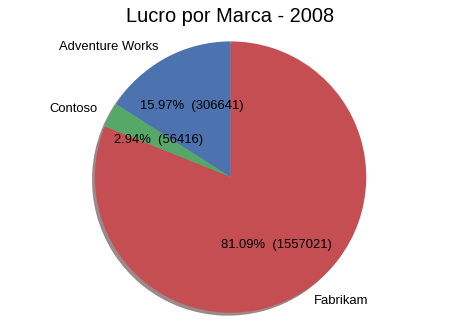

In [62]:
# Gráfico de pizza com lucros e porcentagens das marcas - 2008
fig1, ax1 = plt.subplots()
values = df_2008.groupby("Marca")["Lucro"].sum().values.tolist()
labels = df_2008.groupby("Marca")["Lucro"].sum().index.tolist()
ax1.pie(values, labels=labels, autopct=make_autopct(values), shadow=True, startangle=90, textprops=dict(color="black",fontsize='13'))
ax1.axis('equal')
ax1.set_title("Lucro por Marca - 2008",color="black",fontsize='20')
plt.show()

#### **- Percebemos que o Lucro de 2008 para 2009 diminui para marca Fabrikam e aumenta para as demais.**

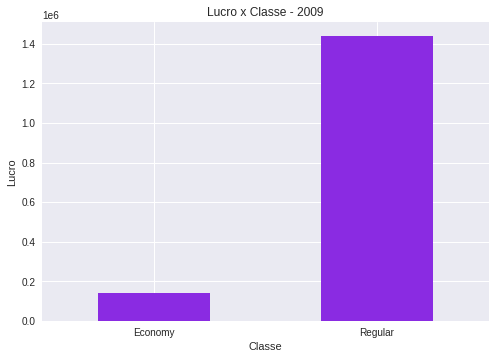

In [63]:
df_2009.groupby("Classe")["Lucro"].sum().plot.bar(title="Lucro x Classe - 2009", color='blueviolet')
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');
plt.show()

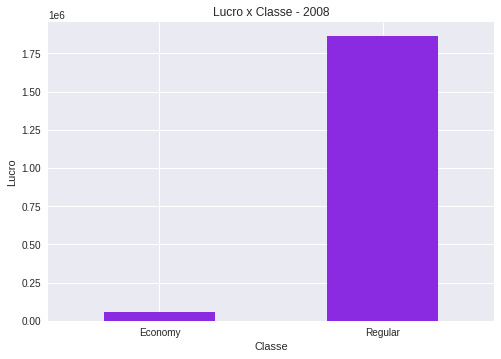

In [64]:
df_2008.groupby("Classe")["Lucro"].sum().plot.bar(title="Lucro x Classe - 2008", color='blueviolet')
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');
plt.show()

#### - De 2008 para 2009 em ambas as classes a almento porém a classe predominante continua sendo Regular

In [65]:
df["Tempo_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

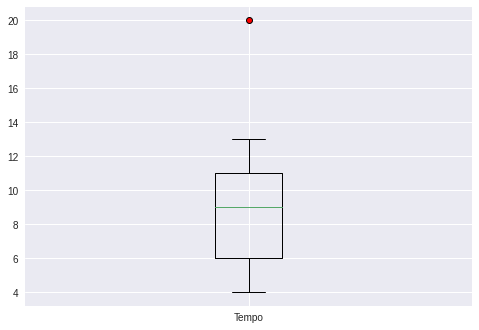

In [66]:
#Gráfico de Boxplot
red_diamond = dict(markerfacecolor='r', marker='o')
plt.boxplot(df["Tempo_envio"],flierprops=red_diamond,labels=['Tempo']);

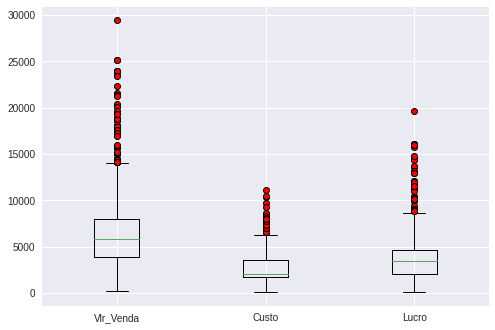

In [67]:
#Gráfico de Boxplot
data = df["Vlr_Venda"],df["Custo"],df["Lucro"]
plt.boxplot(data,flierprops=red_diamond,labels=['Vlr_Venda','Custo','Lucro']);

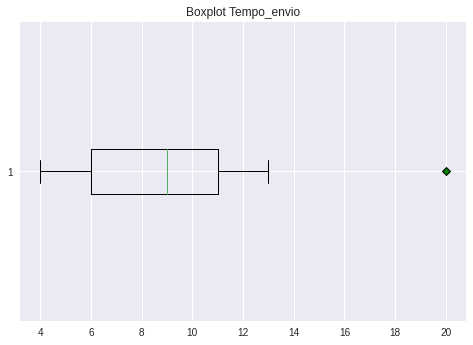

In [68]:
#Gráfico de Boxplot
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(df["Tempo_envio"],flierprops=green_diamond, vert=False);
plt.title('Boxplot Tempo_envio')
plt.show()

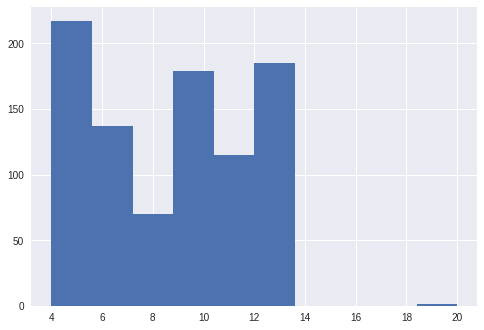

In [69]:
#Histograma
plt.hist(df["Tempo_envio"]);

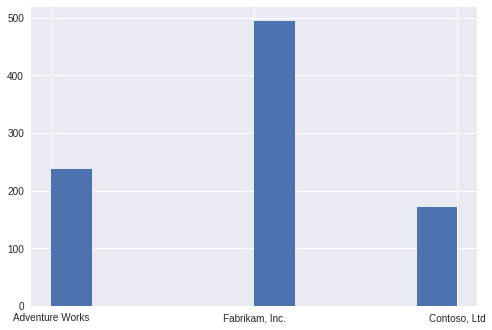

In [70]:
#Histograma
plt.hist(df["Fabricante"]);

In [71]:
#Tempo mínimo de envio
print(f'Tempo mínimo de envio: {df["Tempo_envio"].min()}')

Tempo mínimo de envio: 4


In [72]:
#Tempo máximo de envio
print(f'Tempo máximo de envio: {df["Tempo_envio"].max()}')

Tempo máximo de envio: 20


In [73]:
#Identificando o Outlier
df[df["Tempo_envio"] == 20]

,Data_Venda,Data_Envio,ID_Loja,ID_Produto,ID_Cliente,NoVenda_NF,Custo_Unitario,Preco_Unitario,Qtd,Vlr_Desc,Vlr_Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [74]:
df.to_csv("df_vendas_novo.csv", index=False)

In [75]:
df.loc[df.Tempo_envio ==20]#outliar

,Data_Venda,Data_Envio,ID_Loja,ID_Produto,ID_Cliente,NoVenda_NF,Custo_Unitario,Preco_Unitario,Qtd,Vlr_Desc,Vlr_Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20
